In [11]:
import numpy as np
from mpmath import nsum, exp, inf
import math 
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
K = 5
myu = 1.25
dx = 0.001

In [3]:
def eq_R(p):    # Функция для нахождения корней комплексного уравнения
    x = sym.Symbol('x', real = True)
    sol = sym.solve(x**(K+1) - (p+1) * x + p, x)
    return sol

In [4]:
def root(ro):
    sol = []
    R = []
    sol = eq_R(ro)
    for k in range(len(sol)):
        if abs(sol[k]) < 1:
            R.append(sol[k])
    R = [sym.N(solution) for solution in R]
    return R[0]

In [5]:
def statver(R, RO):
    q = []
    q_K1 = ((R/(1-R) + nsum(lambda i: nsum(lambda k: R**k, [0,i]), [0,K-2]) + 1)/(RO + 1 - R**K) + 1)**(-1)
    q_K = q_K1 / (RO + 1 - R**K)
    Q_sum = 0
    j = 0
    while Q_sum < 1:
        if 0 <= j <= K-2:
            q_j = q_K1 * nsum(lambda i: R**i, [0,j]) / (RO + 1 - R**K)
            q.insert(j, q_j)
        elif j == K-1:
            q_j = q_K1
            q.insert(j, q_j)
        elif j == K:
            q_j = q_K
            q.insert(j, q_j)
        elif j > K:
            q_j = q[K] * R**(j - K)
            q.insert(j, q_j)
        Q_sum += q_j
        if Q_sum >= 0.999:
            break
        j += 1
    return(q)

In [6]:
def F(t, lm, a):    # Подынтегральная функция
    return lm**a * t**(a-1)/(math.factorial(a-1))*np.exp(-lm*t)

In [7]:
def ab(j):
    if j == 0:
        bj = 0
        aj = K*(bj+1) - j
    else:
        bj = math.ceil(j // K)
        aj = K * (bj+1) - j
    return(aj, bj)

In [13]:
def W_function(x, RO):  # Функция W(x)
    R = root(RO)
    q = statver(R,RO)
    lya = RO / myu
    if x <= 0:
        return 0 
    t = np.append(np.arange(0,x,dx),x)
    j = 0
    W_j = 0
    aj, bj = ab(j)
    while j < len(q):
        if aj > 0 and bj > 0:
            Ia = (dx/3)*(F(t[0],lya,aj)+2*np.sum(F(t[2:-2:2],lya,aj))+4*np.sum(F(t[1:-1:2],lya,aj))+F(t[-1], lya,aj))
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ia*Ib            
                
        elif aj == 0 and bj > 0:
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ib            

        elif aj > 0 and bj == 0:
            Ia = (dx/3)*(F(t[0],lya,aj)+2*np.sum(F(t[2:-2:2],lya,aj))+4*np.sum(F(t[1:-1:2],lya,aj))+F(t[-1], lya,aj))
            W_j += q[j]*Ia            
            
        else:
            W_j = 1
        
        j += 1
        aj, bj = ab(j)
            
        if aj == bj == 0 or j > len(q):
            break
    
    return W_j

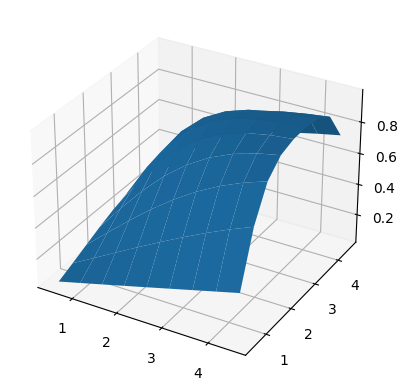

In [16]:
X = np.linspace(0.5, 4.5, 9)
Y = np.linspace(0.5, 4.5, 9)
X, Y = np.meshgrid(X,Y)
W_function_v = np.vectorize(W_function, otypes=[float])
Z = W_function_v(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

In [ ]:
def W_function_two(x, RO):  # Функция W(x)
    R = root(RO)
    q = statver(R,RO)
    lya = RO / myu
    W_j = 0
    if x <= 0:
        return 0 
    t = np.append(np.arange(0,x,dx),x)
    bj = 0
    aj = 0

    for j in range(len(q)):
        bj = j // K
        aj = K * (bj + 1) - j - 1
        
        if aj > 0 and bj > 0:
            Ia = (dx/3)*(F(t[0],lya,aj)+2*np.sum(F(t[2:-2:2],lya,aj))+4*np.sum(F(t[1:-1:2],lya,aj))+F(t[-1], lya,aj))
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ia*Ib
                
        if aj == 0 and bj > 0:
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ib

        if aj > 0 and bj == 0:
            Ia = (dx/3)*(F(t[0],lya,aj)+2*np.sum(F(t[2:-2:2],lya,aj))+4*np.sum(F(t[1:-1:2],lya,aj))+F(t[-1], lya,aj))
            W_j += q[j]*Ia
            
    print(W_j)
    return W_j